- Se instala la librería pandas

In [ ]:
%pip install pandas

- Se importan pandas, pyplot y seaborn, con el fin de realizar el estudio.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


- Se importa el archivo CSV para analizar.

In [2]:
df_movies = pd.read_csv('ETLcsvResults\\the_movies.csv')
df_rating = pd.read_csv('ETLcsvResults\\the_ratings.csv')

In [3]:
df_rating.head(2)

,Unnamed: 0,userId,rating,timestamp,movieId
0,0,1,1.0,1425941529,as680
1,1,1,4.5,1425942435,ns2186


- Se elimina la columna 0 que es la enumeración de cada fila del dataset.

In [4]:
df_movies = df_movies.drop(columns='Unnamed: 0')
df_rating = df_rating.drop(columns='Unnamed: 0')

In [5]:
print(df_movies.shape)
df_movies.head(2)

(22998, 10)


,movieId,type,title,cast,release_year,rating,platform,duration_int,duration_type,score
0,as1,movie,the grand seduction,"brendan gleeson, taylor kitsch, gordon pinsent",2014,g,amazon prime,113,min,3.463048
1,as2,movie,take care good night,"mahesh manjrekar, abhay mahajan, sachin khedekar",2018,13+,amazon prime,110,min,3.566434


In [6]:
print(df_rating.shape)
df_rating.head(2)

(9524289, 4)


,userId,rating,timestamp,movieId
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186


In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   cast           22998 non-null  object 
 4   release_year   22998 non-null  int64  
 5   rating         22998 non-null  object 
 6   platform       22998 non-null  object 
 7   duration_int   22998 non-null  int64  
 8   duration_type  22998 non-null  object 
 9   score          22998 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 1.8+ MB


In [8]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9524289 entries, 0 to 9524288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   rating     float64
 2   timestamp  int64  
 3   movieId    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 290.7+ MB


- Se generan graficos de barras para las variables categóricas que se pueden agrupar, se excluyen 'movieId', 'title' y 'cast' ya que son únicas en cada fila del dataset.

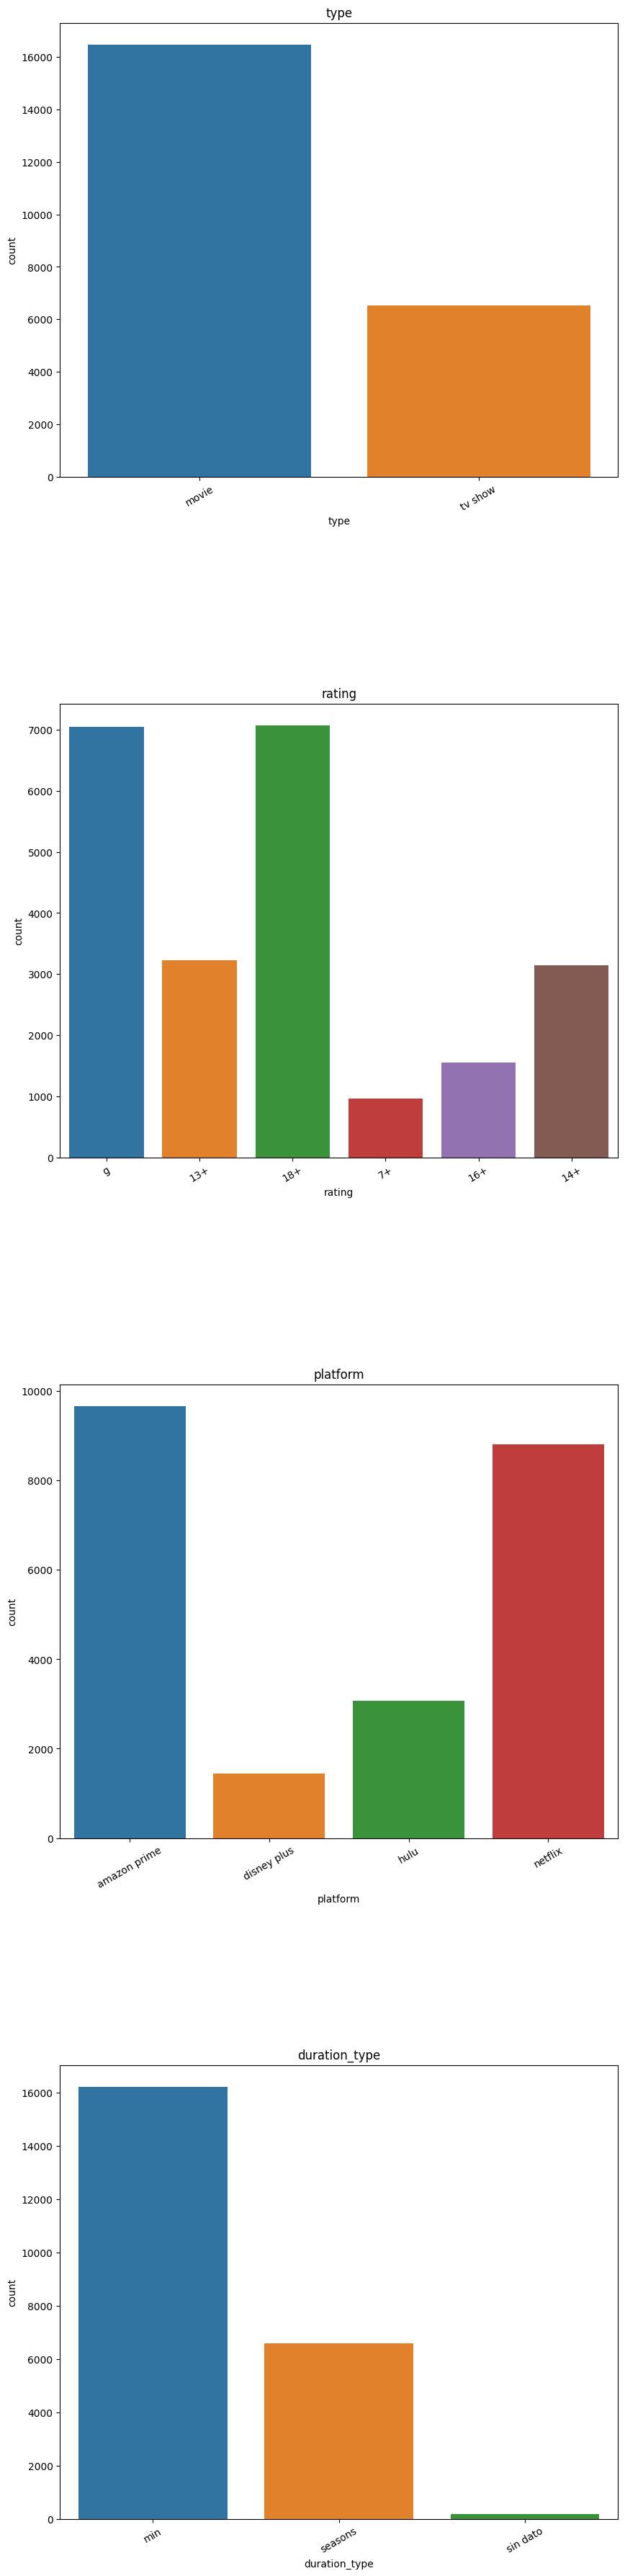

In [9]:
col_cat = ['type', 'rating', 'platform', 'duration_type']

fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df_movies, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)


1. 'type' - 2 -  Hay más del doble de peliculas que series.                                                               
2. 'rating' - 6 - Los títulos categorizados como para mayores de edad y para toda la familia son mayoría. Mientras que los títulos clasificados como +7 son los que menos tienen.                                                                  
3. 'platform' - 4 - amazon tiene más títulos que las otras plataformas, seguido por netflix, hulu y disney plus.             
4. 'duration_type' - 3 - el gráfico es muy similar al de type, ya qué movies se categoriza por minutos y tv shows por temporadas, además están las filas sin dato, que aunque son minoría pueden interferir con este estudio.

- Se eliminan las columnas irrelevantes.

In [10]:
df_movies.drop(columns=[ 'cast', 'release_year', 'duration_int', 'duration_type'], inplace=True)
df_movies.head(2)

,movieId,type,title,rating,platform,score
0,as1,movie,the grand seduction,g,amazon prime,3.463048
1,as2,movie,take care good night,13+,amazon prime,3.566434


In [11]:
df_rating.drop(columns='timestamp', inplace=True)
df_rating.head(2)

,userId,rating,movieId
0,1,1.0,as680
1,1,4.5,ns2186


- Se analizan los valores numéricos.

In [12]:
df_movies.describe()

,score
count,22998.000000
mean,3.532428
std,0.051988
min,3.313253
25%,3.497502
50%,3.532634
75%,3.567633
max,3.745215


In [13]:
df_rating.describe()

,userId,rating
count,9.524289e+06,9.524289e+06
mean,8.579538e+04,3.532430e+00
std,9.274906e+04,1.058196e+00
min,1.000000e+00,5.000000e-01
25%,2.469600e+04,3.000000e+00
50%,4.902000e+04,3.500000e+00
75%,7.363400e+04,4.000000e+00
max,2.708960e+05,5.000000e+00


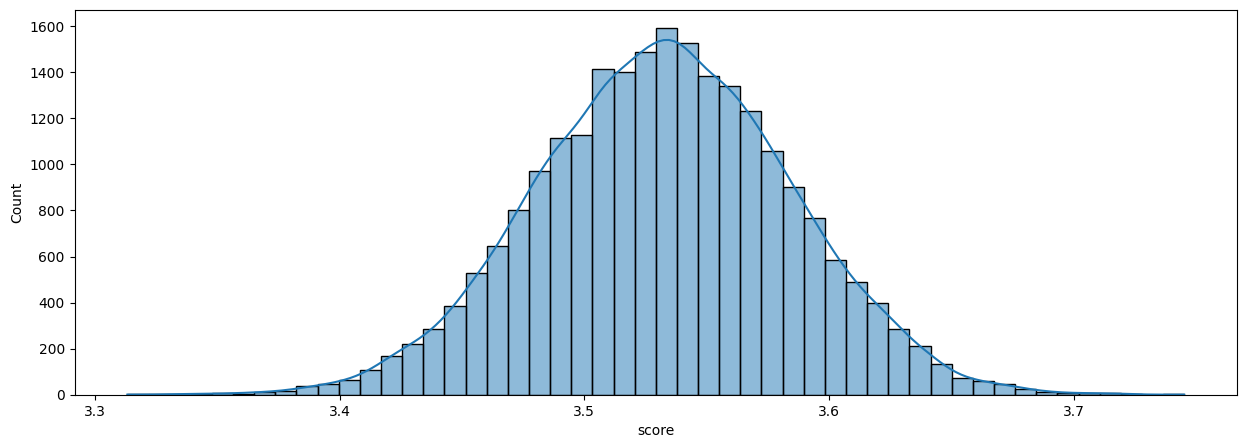

In [14]:
col_num = ['score']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if (col == 'score'):
        nbins = 50
    else:
        nbins = 10
    sns.histplot(x=col, data=df_movies, bins=nbins, kde=True)
    

Observaciones:
    - La mayor parte de las calificaciones se encuentran al rededor del 3.54

- Se guardan los datasets como archivos csv.

In [15]:
df_movies.to_csv('EDAcsvResults\\platforms.csv', index=False)

In [16]:
df_rating.to_csv('EDAcsvResults\\ratings.csv', index=False)